In [1]:
pip install spacy

  Using cached spacy-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached preshed-3.0.8-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (128 kB)
  Using cached srsly-2.4.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (492 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached cymem-2.0.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35 kB)
  Using cached pydantic-2.1.1-py3-none-any.whl (370 kB)
  Using cached catalogue-2.0.9-py3-none-any.whl (17 kB)
  Using cached thinc-8.1.11-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (926 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached murmurhash-1.0.9-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pytextrank

  Using cached pytextrank-3.2.5-py3-none-any.whl (30 kB)
  Using cached icecream-2.1.3-py2.py3-none-any.whl (8.4 kB)
  Using cached scipy-1.11.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.5 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.2.0 requires opencv-contrib-python>=4.2.0, which is not installed.
landlab 2.4.1 requires bmi-topography, which is not installed.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 101.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import spacy
import pytextrank

# example text
text = """Compatibility of systems of linear constraints over the set of natural numbers.
Criteria of compatibility of a system of linear Diophantine equations, strict inequations,
and nonstrict inequations are considered. Upper bounds for components of a minimal set of
solutions and algorithms of construction of minimal generating sets of solutions for all types
of systems are given. These criteria and the corresponding algorithms for constructing a minimal
supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."""

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")

doc = nlp(text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


mixed types
0.18224422086397363 1
[mixed types]
systems
0.177894013810666 3
[systems, systems, systems]
minimal generating sets
0.15012796482367466 1
[minimal generating sets]
nonstrict inequations
0.14619431119413756 1
[nonstrict inequations]
strict inequations
0.13846949336886627 1
[strict inequations]
linear Diophantine equations
0.11980429601355375 1
[linear Diophantine equations]
natural numbers
0.11382139867518232 1
[natural numbers]
solutions
0.10728967890810522 3
[solutions, solutions, solutions]
linear constraints
0.10596399779473555 1
[linear constraints]
all the considered types systems
0.10307674738889895 1
[all the considered types systems]
linear
0.08554976626303484 1
[linear]
a system
0.0821657254086488 1
[a system]
a minimal set
0.07936702627887375 1
[a minimal set]
algorithms
0.07767154470857095 1
[algorithms]
all types
0.07537595845740168 1
[all types]
Diophantine
0.07289137414374329 1
[Diophantine]
construction
0.0698386527264134 1
[construction]
a minimal
supporting

In [7]:
import spacy

# Load the spaCy model for English language
nlp = spacy.load("en_core_web_sm")

# Input text to analyze
text = "the food was decent, but the service was so fucking slow"

# Process the input text using spaCy
doc = nlp(text)

# Iterate through noun chunks in the processed document
for chunk in doc.noun_chunks:
    # Print the text of the noun chunk, the text of the root token, the dependency label of the root token,
    # and the text of the head token of the root token
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)


the food food nsubj was
the service service nsubj was


In [9]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the spaCy model for English language
nlp = spacy.load("en_core_web_sm")

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Input text to analyze
text = "the food was decent, but the service was so fucking slow"

# Process the input text using spaCy
doc = nlp(text)

# List to store extracted phrases and their sentiment scores
phrases = []
current_phrase = []

# Iterate through tokens in the processed document
for token in doc:
    # Check if the token's dependency label is "nsubj" (nominal subject)
    if token.dep_ == "nsubj":
        # If there's an ongoing phrase, process it
        if current_phrase:
            # Combine the current phrase tokens into text
            phrase_text = " ".join(current_phrase)
            # Calculate sentiment score for the phrase using VADER
            sentiment_score = analyzer.polarity_scores(phrase_text)["compound"]
            # Append the phrase and its sentiment score to the list
            phrases.append((phrase_text, sentiment_score))
            # Reset the current phrase for the next iteration
            current_phrase = []
    # Append the token's text to the current phrase
    current_phrase.append(token.text)

# Append the last phrase (after the loop ends)
if current_phrase:
    phrase_text = " ".join(current_phrase)
    sentiment_score = analyzer.polarity_scores(phrase_text)["compound"]
    phrases.append((phrase_text, sentiment_score))

# Print the extracted phrases and their sentiment scores
for phrase, score in phrases:
    print("Phrase:", phrase)
    print("Sentiment Score:", score)
    print()


Phrase: the
Sentiment Score: 0.0

Phrase: food was decent , but the
Sentiment Score: 0.0

Phrase: service was so fucking slow
Sentiment Score: 0.0



In [11]:
import spacy
from textblob import TextBlob

# Load the spaCy model for English language
nlp = spacy.load("en_core_web_sm")

# Input text to analyze
text = "Dont really care. Its gonna happen no matter what we do. Go ahead be a vegan and try to stop cow farts. Not gonna matter. I care more about jobs and america first than fking polar bears. We have pictures of them. Good enough"

# Process the input text using spaCy
doc = nlp(text)

# List to store extracted phrases and their sentiment scores
phrases = []
current_phrase = []

# Iterate through tokens in the processed document
for token in doc:
    # Check if the token's dependency label is "nsubj" (nominal subject)
    if token.dep_ == "nsubj":
        # If there's an ongoing phrase, process it
        if current_phrase:
            # Combine the current phrase tokens into text
            phrase_text = " ".join(current_phrase)
            # Calculate sentiment polarity for the phrase using TextBlob
            sentiment = TextBlob(phrase_text).sentiment.polarity
            # Append the phrase and its sentiment polarity to the list
            phrases.append((phrase_text, sentiment))
            # Reset the current phrase for the next iteration
            current_phrase = []
    # Append the token's text to the current phrase
    current_phrase.append(token.text)

# Append the last phrase (after the loop ends)
if current_phrase:
    phrase_text = " ".join(current_phrase)
    sentiment = TextBlob(phrase_text).sentiment.polarity
    phrases.append((phrase_text, sentiment))

# Print the extracted phrases and their sentiment scores
for phrase, score in phrases:
    print("Phrase:", phrase)
    print("Sentiment Score:", score)
    print()


Phrase: Do nt really care .
Sentiment Score: 0.2

Phrase: Its gon na happen no matter what
Sentiment Score: 0.0

Phrase: we do . Go ahead be a vegan and try to stop cow farts . Not gon na matter .  
Sentiment Score: -0.13333333333333333

Phrase: I care more about jobs and america first than fking polar bears .
Sentiment Score: 0.2222222222222222

Phrase: We have pictures of them . Good enough
Sentiment Score: 0.35



In [182]:
import pandas as pd

df = pd.read_csv('community a.csv')

,Source,Target,author_parent,score,body,post_title,post_content,subreddit,Topic
0,RemindMeBot,jicfbs3,beakbea,1,I will be messaging you in 10 years on [**2033...,Climate change: Do you see more people moving ...,If climate change makes life increasingly diff...,canadahousing,"going, man, thank, probably, food, nuclear, re..."
1,naliron,j9zp6o7,bigd710,18,It hasn't been sustainable since we started wi...,The American climate migration has already beg...,NaN,collapse,"like, cold, say, area, just, thing, world, agr..."
2,baconraygun,j9zp6o7,bigd710,2,Until it's 99% of us.,The American climate migration has already beg...,NaN,collapse,"won, com, change, like, think, just, https, do..."
3,baconraygun,ja0bebw,An-Angel-Named-Billy,6,"It's gonna get real weird in the future when ""...",The American climate migration has already beg...,NaN,collapse,"real, people, yes, love, right, wait, just, ye..."
4,baconraygun,j9zud84,Reservegrowthrulz,2,The cost to rebuild and the infrastructure and...,The American climate migration has already beg...,NaN,collapse,"getting, pretty, don, need, time, way, climate..."


In [183]:
df1 = pd.read_csv('community b.csv')

,Source,Target,author_parent,score,body,post_title,post_content,subreddit,Topic
0,flavius_lacivious,j9zbrlb,TheAbcedarian,16,If you think you can insulate yourself from th...,The American climate migration has already beg...,NaN,collapse,"getting, pretty, don, need, time, way, climate..."
1,flavius_lacivious,ja1p7ko,dinah-fire,8,No they won’t. Let’s just start with millions ...,The American climate migration has already beg...,NaN,collapse,"getting, pretty, don, need, time, way, climate..."
2,flavius_lacivious,ja3e1m8,cat_chat_gato_maau1,-4,"If you are going to argue a point, at least ha...",The American climate migration has already beg...,NaN,collapse,"getting, pretty, don, need, time, way, climate..."
3,CerddwrRhyddid,ja2d5o0,NP_Lima,11,"Reach out and touch faith.\n\nDee do dum, dee ...",The American climate migration has already beg...,NaN,collapse,"going, man, thank, probably, food, nuclear, re..."
4,Additional_Bluebird9,i7qncyl,do-call-me-papi,12,Wow....,Wealthy Americans are buying second passports ...,>The number of wealthy Americans applying for ...,collapse,"won, com, change, like, think, just, https, do..."


In [184]:
import pandas as pd
from textblob import TextBlob
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Initialize empty lists to store extracted phrases, sentiments, and scores
phrases = []
sentiments = []
scores = []

# Process each comment in the DataFrame
for idx, row in df.iterrows():
    comment = row['body']
    doc = nlp(comment)
    current_phrase = []

    # Iterate through tokens in the processed document
    for token in doc:
        # Check if the token's dependency label is "nsubj" (nominal subject)
        if token.dep_ == "nsubj":
            # If there's an ongoing phrase, process it
            if current_phrase:
                # Combine the current phrase tokens into text
                phrase_text = " ".join(current_phrase)
                # Calculate sentiment polarity for the phrase using TextBlob
                sentiment = TextBlob(phrase_text).sentiment.polarity
                # Append the extracted phrase, sentiment, and comment score to lists
                phrases.append(phrase_text)
                sentiments.append(sentiment)
                scores.append(row['score'])
                # Reset the current phrase for the next iteration
                current_phrase = []
        # Append the token's text to the current phrase
        current_phrase.append(token.text)

    # Append the last phrase (after the loop ends)
    if current_phrase:
        phrase_text = " ".join(current_phrase)
        sentiment = TextBlob(phrase_text).sentiment.polarity
        phrases.append(phrase_text)
        sentiments.append(sentiment)
        scores.append(row['score'])

# Create a new DataFrame with extracted phrases, sentiments, and scores
df_phrases = pd.DataFrame({
    'Phrase': phrases,
    'Sentiment': sentiments,
    'Score': scores
    'Topic': topic
})

# Save the new DataFrame to a CSV file
df_phrases.to_csv('phrases_sentiments_scores.csv', index=False)


In [186]:
import pandas as pd
from textblob import TextBlob
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Initialize empty lists
phrases = []
sentiments = []
scores = []

# Process each comment in the DataFrame
for idx, row in df1.iterrows():
    comment = row['body']
    doc = nlp(comment)
    current_phrase = []

    for token in doc:
        if token.dep_ == "nsubj":
            if current_phrase:
                phrase_text = " ".join(current_phrase)
                sentiment = TextBlob(phrase_text).sentiment.polarity
                phrases.append(phrase_text)
                sentiments.append(sentiment)
                scores.append(row['score'])
                current_phrase = []
        current_phrase.append(token.text)

    # Append the last phrase
    if current_phrase:
        phrase_text = " ".join(current_phrase)
        sentiment = TextBlob(phrase_text).sentiment.polarity
        phrases.append(phrase_text)
        sentiments.append(sentiment)
        scores.append(row['score'])

# Create a new DataFrame with phrases, sentiments, and scores
df_phrases_1 = pd.DataFrame({
    'Phrase': phrases,
    'Sentiment': sentiments,
    'Score': scores
    'Topic': topic
})

# Save the DataFrame to a CSV file
df_phrases_1.to_csv('phrases_sentiments_scores.csv', index=False)


In [187]:
df_phrases['Sentiment'].unique()

array([ 0.        ,  0.2       , -0.1       ,  0.7       ,  0.05      ,
       -0.375     ,  0.04166667,  0.41666667,  0.5       , -0.01851852,
        0.055     , -0.875     , -0.2       ,  0.25      ,  0.6       ,
        0.1875    ,  0.16666667,  0.4       , -0.4       ,  0.06666667,
        0.8       , -0.5       ,  0.43958333,  0.45      , -0.8       ,
        1.        ,  0.78125   ,  0.1       ,  0.375     , -0.25      ,
        0.18148148, -0.16666667,  0.13636364, -0.025     , -0.8       ,
       -0.6       , -0.05      , -0.7       , -0.3125    ,  0.1       ,
       -0.06666667, -0.33333333,  0.43333333,  0.125     ,  0.14285714,
       -0.125     , -1.        ,  0.18333333,  0.13333333, -0.09375   ,
       -0.1875    , -0.35      , -0.05      ,  0.21428571, -0.225     ,
        0.01111111,  0.43333333,  0.37777778,  0.175     ,  0.14166667,
       -0.3       ,  0.03125   ,  0.3       ,  0.625     ,  0.28571429,
        0.35      ,  0.85      ,  0.03333333, -0.03125   ,  0.23

In [195]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [196]:
import nltk

# Download the averaged perceptron tagger and WordNet corpus from NLTK
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [160]:
sentiment_scores = df_phrases['Sentiment']

In [161]:
sentiment_scores_1 = df_phrases_1['Sentiment']

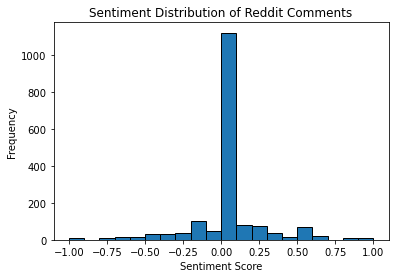

In [162]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.hist(sentiment_scores, bins=20, edgecolor='black')
plt.title('Sentiment Distribution of Reddit Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


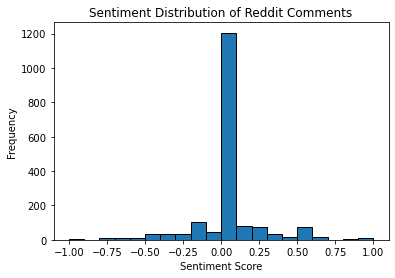

In [163]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.hist(sentiment_scores_1, bins=20, edgecolor='black')
plt.title('Sentiment Distribution of Reddit Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [65]:
topics = df_phrases['topics']

In [36]:
topics_1 = df_phrases_1['topics']

In [37]:
# Create a DataFrame to store topic sentiments
# The DataFrame will have two columns: 'Topic' to store the topics and 'Sentiment' to store corresponding sentiment scores
topic_sentiments = pd.DataFrame({'Topic': topics, 'Sentiment': df_phrases['Sentiment']})

In [208]:
# Create a DataFrame to store topic sentiments
# The DataFrame will have two columns: 'Topic' to store the topics and 'Sentiment' to store corresponding sentiment scores
topic_sentiments_1 = pd.DataFrame({'Topic': topics_1, 'Sentiment': df_phrases_1['Sentiment']})

In [41]:
average_sentiments = topic_sentiments.groupby('Topic')['Sentiment'].mean()

In [42]:
average_sentiments_1 = topic_sentiments_1.groupby('Topic')['Sentiment'].mean()

In [43]:
sorted_sentiments = average_sentiments.sort_values(ascending=False)

In [213]:
sorted_sentiments_1 = average_sentiments_1.sort_values(ascending=False)

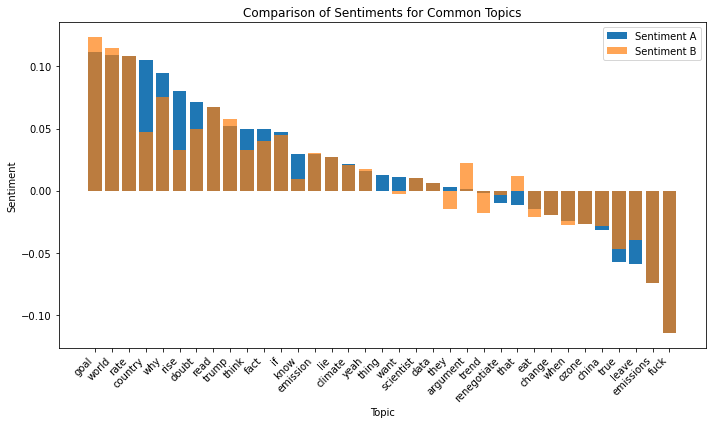

In [218]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrames from the Series
df_phrases = sorted_sentiments.reset_index()
df_phrases_1 = sorted_sentiments_1.reset_index()

# Merge the two DataFrames based on the 'Topic' column
merged_df = pd.merge(df_phrases_1, df_phrases, on='Topic', suffixes=('_a', '_b'))

# Calculate the absolute difference in sentiment between Sentiment A and Sentiment B
merged_df['Sentiment_diff'] = abs(merged_df['Sentiment_a'] - merged_df['Sentiment_b'])

# Get the topics with the greatest sentiment differences
top_diff_topics = merged_df.nlargest(10, 'Sentiment_diff')['Topic']

# Filter the merged DataFrame to include only the top difference topics
filtered_df = merged_df[merged_df['Topic'].isin(top_diff_topics)]

# Manual labels for the x-axis
x_labels = ['label 1','label 2','label 3']

# Plot the filtered topics and their sentiments
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Topic'], filtered_df['Sentiment_a'], label='Sentiment A')
plt.bar(filtered_df['Topic'], filtered_df['Sentiment_b'], label='Sentiment B', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Sentiment')
plt.title('Comparison of Sentiments for Topics with Greatest Differences')
plt.xticks(filtered_df['Topic'], x_labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('figure.png', dpi=300)
plt.show()


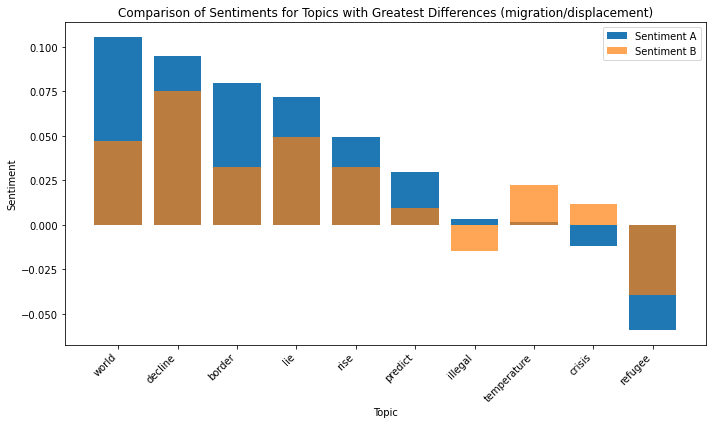

In [222]:
# Get the topics with the greatest sentiment differences
top_diff_topics = merged_df.nlargest(10, 'Sentiment_diff')['Topic']

# Filter the merged DataFrame to include only the top difference topics
filtered_df = merged_df[merged_df['Topic'].isin(top_diff_topics)]

# Manual labels for the x-axis
x_labels = ['label 1','label 2','label 3']

# Plot the filtered topics and their sentiments
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Topic'], filtered_df['Sentiment_a'], label='Sentiment A')
plt.bar(filtered_df['Topic'], filtered_df['Sentiment_b'], label='Sentiment B', alpha=0.7)
plt.xlabel('Topic')
plt.ylabel('Sentiment')
plt.title('Comparison of Sentiments for Topics with Greatest Differences')
plt.xticks(filtered_df['Topic'], x_labels, rotation=45, ha='right')
plt.yticks()  
plt.legend()
plt.tight_layout()
plt.savefig('figure.png', dpi=300)
plt.show()
